# Dataset de competição

## Fase 0: Imports e Leitura dos Dados

In [643]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re # Used in Data Processing
from sklearn import preprocessing

# Definir o número máximo de colunas do pandas para 40
pd.set_option('display.max_columns', 40)

The following configuration was implemented to avoid pandas from considering that the 'None' value in the column 'Injeçao na rede (kWh)' is NaN.

In [644]:
allowed_nans = ['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN',
                '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA',
                'NULL', 'NaN', 'n/a', 'nan', 'null']

treino = pd.read_csv('datasets/treino.csv', na_values=allowed_nans, keep_default_na=False)
teste = pd.read_csv('datasets/teste.csv', na_values=allowed_nans, keep_default_na=False)

## Fase 1: Exploração Simples dos Dados

In [645]:
treino.shape

(11688, 21)

In [646]:
treino.columns

Index(['Data', 'Hora', 'Normal (kWh)', 'Horario Economico (kWh)',
       'Autoconsumo (kWh)', 'Injeçao na rede (kWh)', 'dt', 'dt_iso',
       'city_name', 'temp', 'feels_like', 'temp_min', 'temp_max', 'pressure',
       'sea_level', 'grnd_level', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description'],
      dtype='object')

In [647]:
treino.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injeçao na rede (kWh),dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,NaN,NaN,NaN,NaN,NaN,NaN,1630454400,2021-09-01 00:00:00 +0000 UTC,local,18.74,18.84,15.72,20.34,1015,NaN,NaN,83,1.18,NaN,78,broken clouds
1,NaN,NaN,NaN,NaN,NaN,NaN,1630458000,2021-09-01 01:00:00 +0000 UTC,local,18.73,18.83,15.72,20.34,1014,NaN,NaN,83,1.46,NaN,92,overcast clouds
2,NaN,NaN,NaN,NaN,NaN,NaN,1630461600,2021-09-01 02:00:00 +0000 UTC,local,17.84,17.98,16.72,20.34,1014,NaN,NaN,88,1.05,NaN,91,overcast clouds
3,NaN,NaN,NaN,NaN,NaN,NaN,1630465200,2021-09-01 03:00:00 +0000 UTC,local,18.27,18.40,16.68,20.34,1014,NaN,NaN,86,0.46,0.14,94,light rain
4,NaN,NaN,NaN,NaN,NaN,NaN,1630468800,2021-09-01 04:00:00 +0000 UTC,local,17.81,17.97,16.12,20.34,1013,NaN,NaN,89,0.93,1.26,95,moderate rain


In [648]:
treino.describe()

,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all
count,11016.000000,11016.000000,11016.000000,11016.000000,1.168800e+04,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,0.0,0.0,11688.000000,11688.000000,2435.000000,11688.000000
mean,11.500000,0.202278,0.159714,0.117314,1.651491e+09,16.406638,16.076164,14.433353,17.502990,1018.304073,NaN,NaN,76.619011,2.647688,0.884760,54.258214
std,6.922501,0.349478,0.271792,0.176762,1.214705e+07,5.715977,6.217605,4.960590,6.112344,6.109727,NaN,NaN,16.157421,1.458574,1.073453,40.443374
min,0.000000,0.000000,0.000000,0.000000,1.630454e+09,0.320000,-2.190000,-0.640000,1.330000,994.000000,NaN,NaN,19.000000,0.060000,0.100000,0.000000
25%,5.750000,0.000000,0.000000,0.000000,1.640973e+09,12.350000,11.760000,10.900000,12.930000,1015.000000,NaN,NaN,66.000000,1.610000,0.210000,7.000000
50%,11.500000,0.000000,0.000000,0.000000,1.651491e+09,15.760000,15.675000,14.540000,16.720000,1018.000000,NaN,NaN,81.000000,2.380000,0.450000,60.000000
75%,17.250000,0.314000,0.288000,0.227000,1.662009e+09,19.540000,19.560000,17.720000,20.700000,1022.000000,NaN,NaN,91.000000,3.400000,1.070000,98.000000
max,23.000000,3.251000,6.978000,1.192000,1.672528e+09,40.850000,41.330000,36.720000,41.450000,1034.000000,NaN,NaN,100.000000,11.100000,7.450000,100.000000


In [649]:
treino.duplicated().any()

False

In [650]:
treino.isna().any()

Data                        True
Hora                        True
Normal (kWh)                True
Horario Economico (kWh)     True
Autoconsumo (kWh)           True
Injeçao na rede (kWh)       True
dt                         False
dt_iso                     False
city_name                  False
temp                       False
feels_like                 False
temp_min                   False
temp_max                   False
pressure                   False
sea_level                   True
grnd_level                  True
humidity                   False
wind_speed                 False
rain_1h                     True
clouds_all                 False
weather_description        False
dtype: bool

In [651]:
treino.dtypes

Data                        object
Hora                       float64
Normal (kWh)               float64
Horario Economico (kWh)    float64
Autoconsumo (kWh)          float64
Injeçao na rede (kWh)       object
dt                           int64
dt_iso                      object
city_name                   object
temp                       float64
feels_like                 float64
temp_min                   float64
temp_max                   float64
pressure                     int64
sea_level                  float64
grnd_level                 float64
humidity                     int64
wind_speed                 float64
rain_1h                    float64
clouds_all                   int64
weather_description         object
dtype: object

In [652]:
treino['Normal (kWh)'].value_counts()

Normal (kWh)
0.000    6018
0.001      23
0.008      19
0.252      17
0.016      17
         ... 
1.746       1
2.269       1
1.374       1
1.541       1
1.098       1
Name: count, Length: 1282, dtype: int64

In [653]:
teste['weather_description'].value_counts()

weather_description
sky is clear            739
overcast clouds         305
light rain              299
broken clouds           149
scattered clouds        118
few clouds               70
moderate rain            65
heavy intensity rain      7
Name: count, dtype: int64

In [654]:
treino['rain_1h'].isna().sum()

9253

In [655]:
teste['rain_1h'].isna().sum()

2050

In [656]:
treino['city_name'].value_counts()

city_name
local    11688
Name: count, dtype: int64

In [657]:
treino['city_name'].nunique()

1

'city_name' is a useless column because it only has 1 value. 

In [658]:
treino['dt_iso'].isna().sum()

0

'dt_iso' has 0 missing values so it can replace the columns 'Data' and 'Hora' that have some missing values.

In [659]:
treino['sea_level'].isna().sum()

11688

For all the entries in the dataset, the feature 'sea_level' has a missing value. For this reason this feature is useless and must be removed.

In [660]:
treino['grnd_level'].isna().sum()

11688

For all the entries in the dataset, the feature 'grnd_level' has a missing value. For this reason this feature is useless and must be removed.

Checking for outliers in the features: "Normal (kWH)", "Horario Economico (kWh)" and "Autoconsumo (kWh)". This information lets us decide which way we are going to handle the missing values in this features.

In [661]:
tc = treino.copy()
columns_to_drop = ['Data', 'Hora', 'Injeçao na rede (kWh)', 'dt', 'dt_iso', 'city_name', 'temp' ,'feels_like', 'temp_min', 'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity', 'wind_speed', 'rain_1h', 'clouds_all', 'weather_description']
tc.drop(columns_to_drop, inplace=True, axis=1)
tc.boxplot()

<Axes: >

All 3 features have outliers, the best way to treat their missing values is by using the median and not the mean.

In [662]:
treino.isna().sum()

Data                         672
Hora                         672
Normal (kWh)                 672
Horario Economico (kWh)      672
Autoconsumo (kWh)            672
Injeçao na rede (kWh)        672
dt                             0
dt_iso                         0
city_name                      0
temp                           0
feels_like                     0
temp_min                       0
temp_max                       0
pressure                       0
sea_level                  11688
grnd_level                 11688
humidity                       0
wind_speed                     0
rain_1h                     9253
clouds_all                     0
weather_description            0
dtype: int64

In [663]:
teste.isna().sum()

Data                          0
Hora                          0
Normal (kWh)                  0
Horario Economico (kWh)       0
Autoconsumo (kWh)             0
dt                          504
dt_iso                        0
city_name                   504
temp                          0
feels_like                    0
temp_min                      0
temp_max                      0
pressure                    504
sea_level                  1752
grnd_level                 1752
humidity                      0
wind_speed                    0
rain_1h                    2050
clouds_all                    0
weather_description         504
dtype: int64

## Fase 2: Tratamento dos Dados

The column 'city_name' only has 1 possible value so it is useless and must the removed from the dataset. 

In [664]:
treino.drop('city_name', inplace=True, axis=1)
teste.drop('city_name', inplace=True, axis=1)

Like it was stated before, the features 'sea_level' and 'grnd_level' have 100% missing value presence and so must be removed.

In [665]:
treino.drop('sea_level', inplace=True, axis=1)
treino.drop('grnd_level', inplace=True, axis=1)

teste.drop('sea_level', inplace=True, axis=1)
teste.drop('grnd_level', inplace=True, axis=1)

The column 'dt_iso' will replace the columns 'Data' and 'Hora'. The 'dt_iso' column is going to also be split into two new columns: 'Date' and 'Hour'.

In [666]:
def toDate(d):
    return re.search(r'\d+\-\d+\-\d+', d).group()

def toHour(h):
    return re.search(r'(\d+)\:\d+\:\d+', h).group(1)

treino.drop('Data', inplace=True, axis=1)
treino.drop('Hora', inplace=True, axis=1)
hour = treino['dt_iso']
treino.insert(0, 'Hour', hour)
treino.rename(columns = {'dt_iso':'Date'}, inplace = True)

dates = treino['Date'].apply(toDate)
treino['Date'] = dates
hours = treino['Hour'].apply(toHour)
treino['Hour'] = hours
treino['Hour'] = treino['Hour'].astype(int)

dates = treino.pop('Date') 
treino.insert(0, 'Date', dates) 
dts = treino.pop('dt') 
treino.insert(0, 'dt', dts)
treino

,dt,Date,Hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injeçao na rede (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01,0,NaN,NaN,NaN,NaN,18.74,18.84,15.72,20.34,1015,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01,1,NaN,NaN,NaN,NaN,18.73,18.83,15.72,20.34,1014,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01,2,NaN,NaN,NaN,NaN,17.84,17.98,16.72,20.34,1014,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01,3,NaN,NaN,NaN,NaN,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01,4,NaN,NaN,NaN,NaN,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95,moderate rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11683,1672513200,2022-12-31,19,1.693,0.000,0.0,None,15.70,15.57,15.57,15.72,1018,86,5.56,3.58,100,moderate rain
11684,1672516800,2022-12-31,20,1.327,0.000,0.0,None,15.55,15.43,12.72,15.70,1018,87,4.47,4.20,100,heavy intensity rain
11685,1672520400,2022-12-31,21,0.757,0.000,0.0,None,13.45,13.28,12.23,13.99,1019,93,3.29,4.23,100,heavy intensity rain
11686,1672524000,2022-12-31,22,0.000,0.675,0.0,None,12.93,12.73,12.23,13.43,1019,94,1.49,3.90,100,moderate rain


For the "teste" dataset, we use the columns "Data" e "Hora" to replace the missing values from the "dt_iso" column, basically we do the opposite of the "treino" dataset.

In [667]:
teste.drop('dt_iso', inplace=True, axis=1)
teste.rename(columns = {'Data':'Date'}, inplace = True)
teste.rename(columns = {'Hora':'Hour'}, inplace = True)
teste['Hour'] = teste['Hour'].astype(int)

dts = teste.pop('dt') 
teste.insert(0, 'dt', dts)
teste

,dt,Date,Hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1.672531e+09,2023-01-01,0,0.000,0.467,0.000,12.93,12.76,12.72,13.43,1019.0,95,2.02,3.72,100.0,moderate rain
1,1.672535e+09,2023-01-01,1,0.000,0.577,0.000,13.49,13.38,13.43,13.90,1018.0,95,2.18,3.26,100.0,moderate rain
2,1.672538e+09,2023-01-01,2,0.000,0.346,0.000,13.55,13.44,13.48,14.82,1017.0,95,2.88,2.44,100.0,moderate rain
3,1.672542e+09,2023-01-01,3,0.000,0.270,0.000,13.61,13.51,12.01,14.82,1016.0,95,3.63,1.74,100.0,moderate rain
4,1.672546e+09,2023-01-01,4,0.000,0.252,0.000,13.59,13.49,12.01,14.82,1015.0,95,4.58,1.13,100.0,moderate rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,NaN,2023-04-04,19,0.953,0.000,0.012,20.10,18.10,3.60,20.40,NaN,35,1.20,NaN,0.0,NaN
2252,NaN,2023-04-04,20,0.915,0.000,0.000,13.60,11.50,3.60,20.40,NaN,63,2.47,NaN,0.0,NaN
2253,NaN,2023-04-04,21,0.479,0.000,0.000,12.60,10.60,3.60,20.40,NaN,67,2.22,NaN,2.0,NaN
2254,NaN,2023-04-04,22,0.000,0.497,0.000,11.70,9.50,3.60,20.40,NaN,68,2.41,NaN,1.0,NaN


The "dt" column is a timestamp (an id for the time), and so it is useless and must be removed

In [668]:
treino.drop('dt', inplace=True, axis=1)
teste.drop('dt', inplace=True, axis=1)

Another 2 columns that we can create are the column 'Month', representing the current month of the instance, and the column 'Season', representing the current season of the instance.

In [669]:
months = treino['Date']
seasons = treino['Date']

treino.insert(3, 'Month', months)
treino.insert(4, 'Season', seasons)

monthsL = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

def toMonth(m):
    return monthsL[int(re.search(r'\-(\d+)\-', m).group(1))-1]

def toSeason(s):
    m = int(re.search(r'\-(\d+)\-', s).group(1))
    if m >= 3 and m <= 5:
        return 'Spring'
    if m >= 6 and m <= 8:
        return 'Summer'
    if m >= 9 and m <= 11:
        return 'Autumn'
    if (m >= 1 and m <= 2) or m == 12:
        return 'Winter'

months = treino['Month'].apply(toMonth)
treino['Month'] = months
seasons = treino['Season'].apply(toSeason)
treino['Season'] = seasons

seasons = treino.pop('Season')
treino.insert(2, 'Season', seasons)

mths = treino.pop('Month')
treino.insert(3, 'Month', mths)

# Teste
months = teste['Date'].apply(toMonth)
seasons = teste['Date'].apply(toSeason)

teste.insert(2, 'Season', seasons)
teste.insert(3, 'Month', months)

A high percentage (80% of more), of both the "treino" and "teste" datasets for the feature "rain_1h" have missing values. In this case, the best approach to take is to remove the entire column

In [670]:
treino.drop('rain_1h', inplace=True, axis=1)
teste.drop('rain_1h', inplace=True, axis=1)

The feature "weather_description" in the "teste" dataset has 504 entries with missing values. For now, we will use the mode to treat this missing values

In [671]:
# teste['weather_description'].fillna(teste['weather_description'].mode()[0], inplace=True)
from sklearn.tree import DecisionTreeClassifier

label_encoder_wd = preprocessing.LabelEncoder() 

teste_wd = teste.copy()

teste_wd['Date'] = label_encoder_wd.fit_transform(teste_wd['Date'])
teste_wd['Season'] = label_encoder_wd.fit_transform(teste_wd['Season'])
teste_wd['Month'] = label_encoder_wd.fit_transform(teste_wd['Month'])

treino_wd = teste_wd.dropna()
teste_wd = teste_wd[teste_wd['weather_description'].isnull()]

X_treino_wd = treino_wd.drop('weather_description', axis=1)
y_treino_wd = treino_wd['weather_description']

X_teste_wd = teste_wd.drop('weather_description', axis=1)

clf = DecisionTreeClassifier(random_state=183)
clf.fit(X_treino_wd, y_treino_wd)
predictions = clf.predict(X_teste_wd)

# Fill the missing values with the predictions
indicies_of_missing = teste[teste['weather_description'].isnull()].index # list of the missing indices
for fill_index, dataframe_index in enumerate(indicies_of_missing):
    teste.loc[dataframe_index, 'weather_description'] = predictions[fill_index]

predictions

array(['sky is clear', 'sky is clear', 'light rain', 'light rain',
       'light rain', 'light rain', 'light rain', 'light rain',
       'light rain', 'light rain', 'light rain', 'light rain',
       'light rain', 'light rain', 'light rain', 'light rain',
       'light rain', 'light rain', 'light rain', 'light rain',
       'light rain', 'light rain', 'scattered clouds', 'scattered clouds',
       'scattered clouds', 'scattered clouds', 'scattered clouds',
       'scattered clouds', 'scattered clouds', 'scattered clouds',
       'scattered clouds', 'scattered clouds', 'scattered clouds',
       'scattered clouds', 'scattered clouds', 'scattered clouds',
       'overcast clouds', 'overcast clouds', 'broken clouds',
       'overcast clouds', 'overcast clouds', 'overcast clouds',
       'overcast clouds', 'overcast clouds', 'overcast clouds',
       'overcast clouds', 'light rain', 'light rain', 'scattered clouds',
       'light rain', 'overcast clouds', 'overcast clouds', 'light rain',
 

In the first 672 entries of the "treino" dataset the features "Normal (kWh)", "Autoconsumo (kWh)", "Horario Economico (kWh)" and "Injeçao na rede (kWh)" all have missing values. Because there is a large number of features with missing values in this entries and because this only represents 5% of the entire dataset we decided to remove all this entries.

In [672]:
treino.dropna(subset=['Injeçao na rede (kWh)'], inplace=True)

In [673]:
treino

,Date,Hour,Season,Month,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injeçao na rede (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description
672,2021-09-29,0,Autumn,September,0.000,0.000,0.0,None,13.97,13.54,11.45,14.04,1027,81,1.96,87,overcast clouds
673,2021-09-29,1,Autumn,September,0.000,0.000,0.0,None,13.48,13.02,13.43,13.90,1028,82,1.83,91,overcast clouds
674,2021-09-29,2,Autumn,September,0.000,0.000,0.0,None,12.93,12.47,12.72,13.43,1027,84,1.96,93,overcast clouds
675,2021-09-29,3,Autumn,September,0.000,0.000,0.0,None,12.61,12.15,10.34,12.93,1027,85,1.85,95,overcast clouds
676,2021-09-29,4,Autumn,September,0.000,0.000,0.0,None,12.61,12.17,9.79,12.93,1027,86,1.83,93,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11683,2022-12-31,19,Winter,December,1.693,0.000,0.0,None,15.70,15.57,15.57,15.72,1018,86,5.56,100,moderate rain
11684,2022-12-31,20,Winter,December,1.327,0.000,0.0,None,15.55,15.43,12.72,15.70,1018,87,4.47,100,heavy intensity rain
11685,2022-12-31,21,Winter,December,0.757,0.000,0.0,None,13.45,13.28,12.23,13.99,1019,93,3.29,100,heavy intensity rain
11686,2022-12-31,22,Winter,December,0.000,0.675,0.0,None,12.93,12.73,12.23,13.43,1019,94,1.49,100,moderate rain


In [674]:
teste

,Date,Hour,Season,Month,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description
0,2023-01-01,0,Winter,January,0.000,0.467,0.000,12.93,12.76,12.72,13.43,1019.0,95,2.02,100.0,moderate rain
1,2023-01-01,1,Winter,January,0.000,0.577,0.000,13.49,13.38,13.43,13.90,1018.0,95,2.18,100.0,moderate rain
2,2023-01-01,2,Winter,January,0.000,0.346,0.000,13.55,13.44,13.48,14.82,1017.0,95,2.88,100.0,moderate rain
3,2023-01-01,3,Winter,January,0.000,0.270,0.000,13.61,13.51,12.01,14.82,1016.0,95,3.63,100.0,moderate rain
4,2023-01-01,4,Winter,January,0.000,0.252,0.000,13.59,13.49,12.01,14.82,1015.0,95,4.58,100.0,moderate rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,2023-04-04,19,Spring,April,0.953,0.000,0.012,20.10,18.10,3.60,20.40,NaN,35,1.20,0.0,light rain
2252,2023-04-04,20,Spring,April,0.915,0.000,0.000,13.60,11.50,3.60,20.40,NaN,63,2.47,0.0,light rain
2253,2023-04-04,21,Spring,April,0.479,0.000,0.000,12.60,10.60,3.60,20.40,NaN,67,2.22,2.0,light rain
2254,2023-04-04,22,Spring,April,0.000,0.497,0.000,11.70,9.50,3.60,20.40,NaN,68,2.41,1.0,light rain


## Fase 3: Exploração Detalhada

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


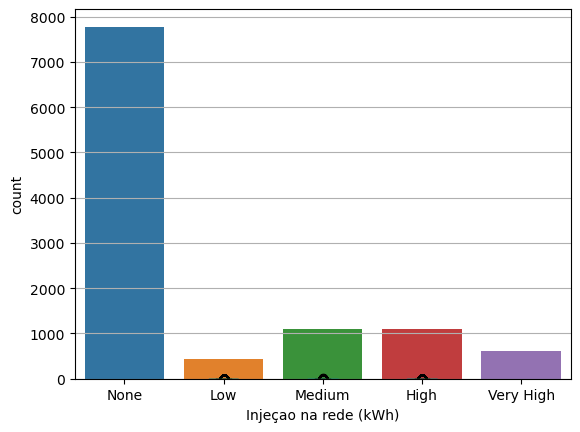

In [675]:
sns.countplot(x='Injeçao na rede (kWh)', data=treino)
plt.show()

### 'Hour' vs 'Normal (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


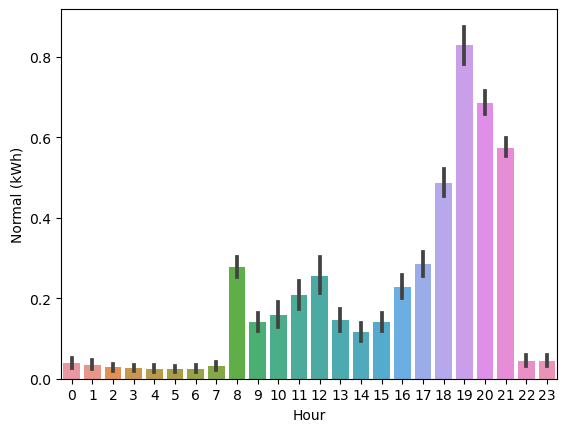

In [676]:
sns.barplot(x='Hour', y='Normal (kWh)', data=treino)
plt.show()

### 'Hour' vs 'Horario Economico (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


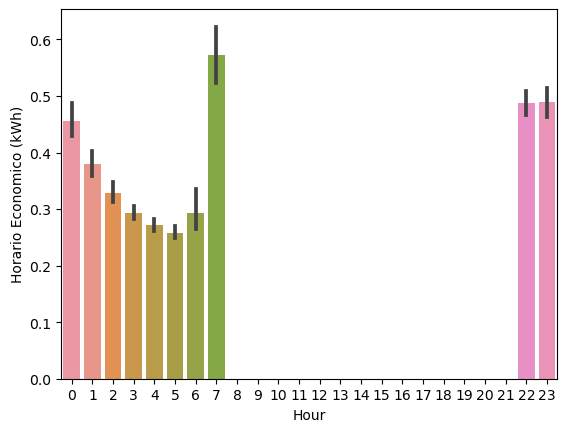

In [677]:
sns.barplot(x='Hour', y='Horario Economico (kWh)', data=treino)
plt.show()

### Relation: 'Month' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


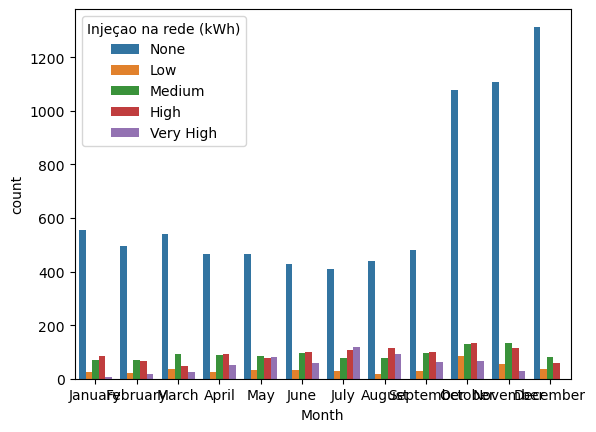

In [678]:
sns.countplot(x='Month', order=monthsL, hue='Injeçao na rede (kWh)', data=treino)
plt.show()

### Relation: 'Season' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

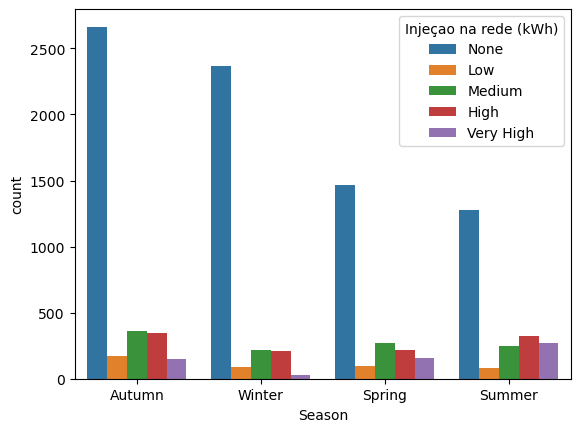

In [679]:
sns.countplot(x='Season', hue='Injeçao na rede (kWh)', data=treino)
plt.show()

### Relation: 'Normal (kWh)' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


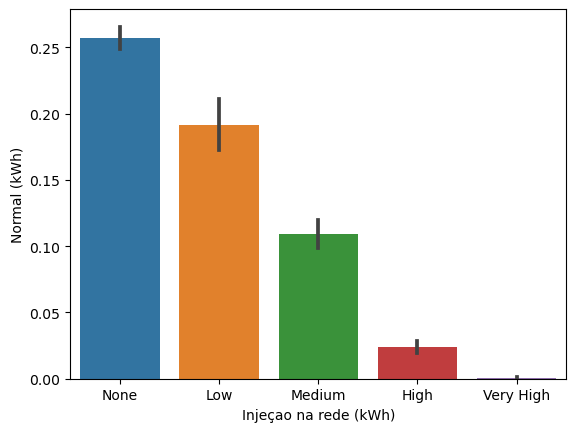

In [680]:
sns.barplot(x='Injeçao na rede (kWh)', y='Normal (kWh)', data=treino)
plt.show()

### Relation: 'Horario Economico (kWh)' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


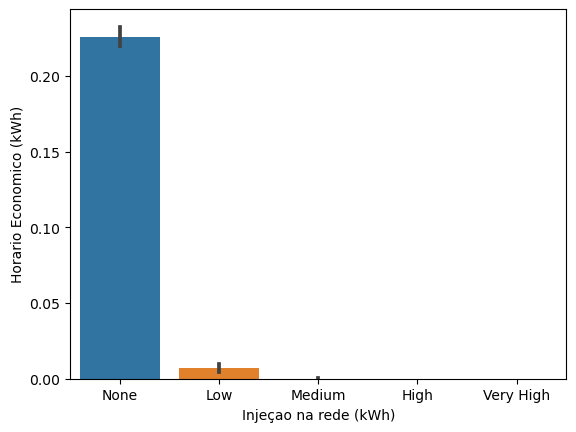

In [681]:
sns.barplot(x='Injeçao na rede (kWh)', y='Horario Economico (kWh)', data=treino)
plt.show()

### Relation: 'Autoconsumo (kWh)' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


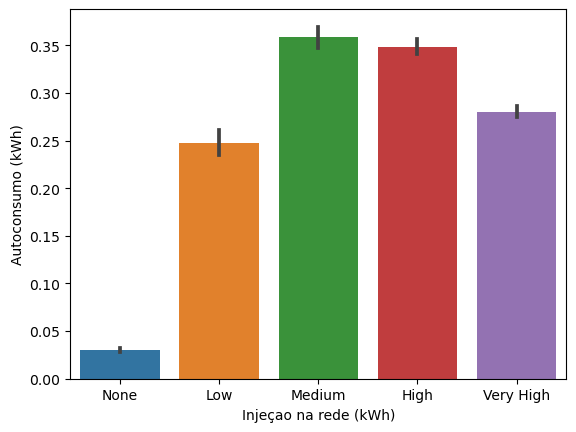

In [682]:
sns.barplot(x='Injeçao na rede (kWh)', y='Autoconsumo (kWh)', data=treino)
plt.show()

### Relation: 'temp' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


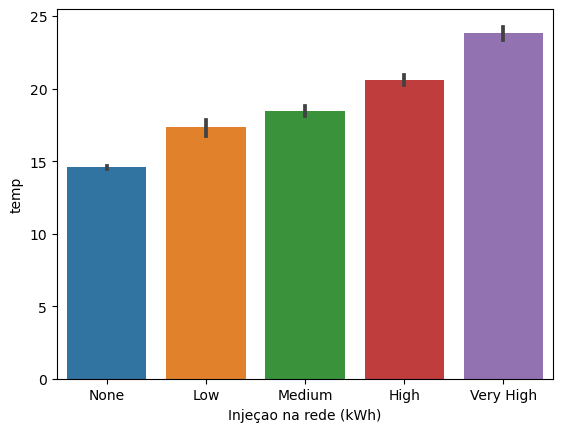

In [683]:
sns.barplot(x='Injeçao na rede (kWh)', y='temp', data=treino)
plt.show()

### Relation: 'feels_like' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


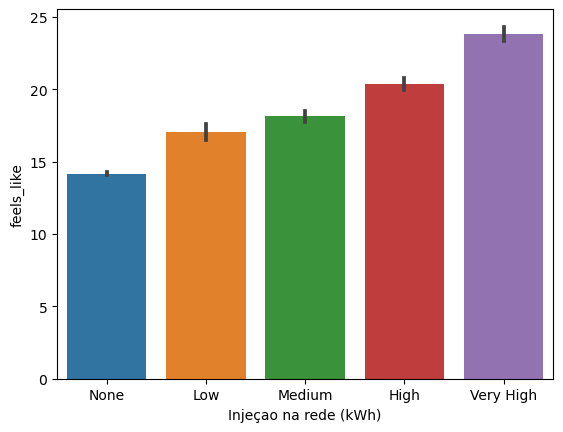

In [684]:
sns.barplot(x='Injeçao na rede (kWh)', y='feels_like', data=treino)
plt.show()

### Relation: 'temp_min' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


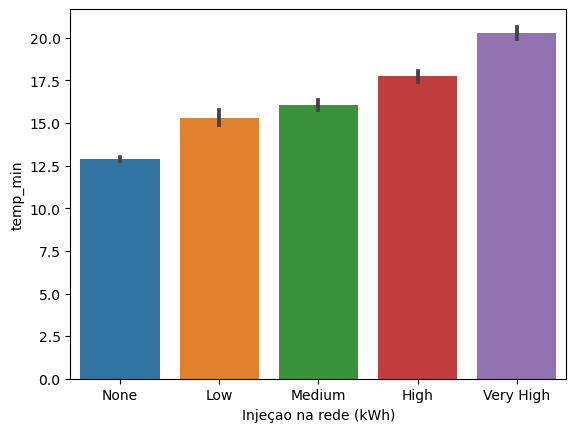

In [685]:
sns.barplot(x='Injeçao na rede (kWh)', y='temp_min', data=treino)
plt.show()

### Relation: 'temp_max' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


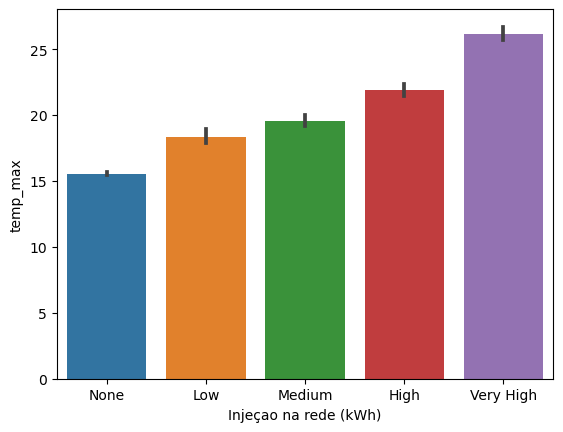

In [686]:
sns.barplot(x='Injeçao na rede (kWh)', y='temp_max', data=treino)
plt.show()

### Relation: 'pressure' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


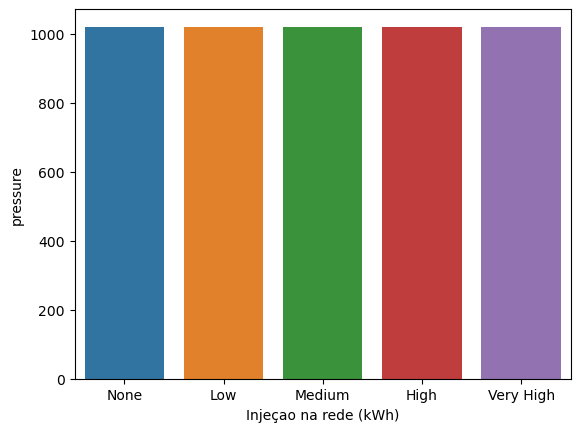

In [687]:
sns.barplot(x='Injeçao na rede (kWh)', y='pressure', data=treino)
plt.show()

### Relation: 'humidity' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


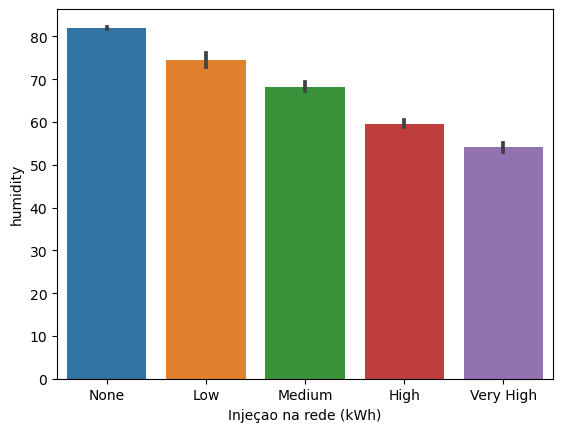

In [688]:
sns.barplot(x='Injeçao na rede (kWh)', y='humidity', data=treino)
plt.show()

### Relation: 'wind_speed' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


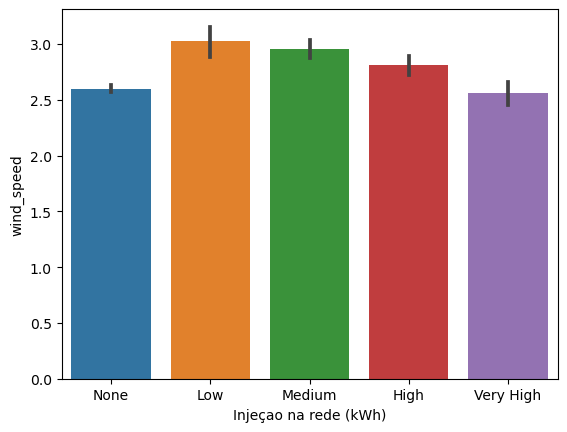

In [689]:
sns.barplot(x='Injeçao na rede (kWh)', y='wind_speed', data=treino)
plt.show()

We can check that the feature 'rain_1h', when the feature 'Injeçao na rede (kWh)' takes the value 'Very High', is very scattered.

### Relation: 'clouds_all' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


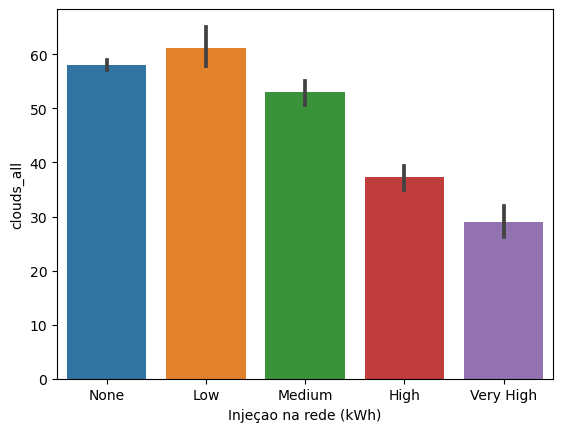

In [690]:
sns.barplot(x='Injeçao na rede (kWh)', y='clouds_all', data=treino)
plt.show()

### Relation: 'weather_description' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


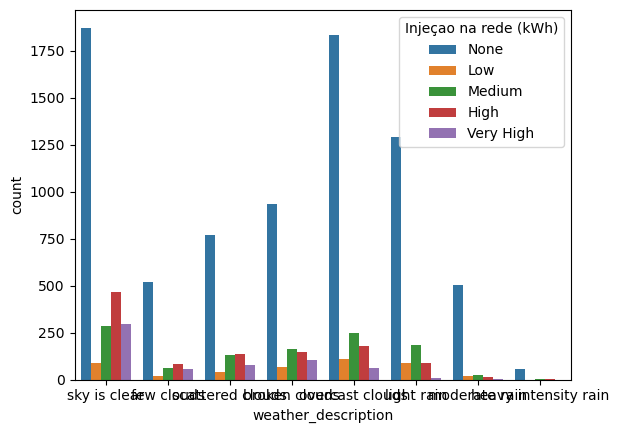

In [691]:
w_d_order = ['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds', 'overcast clouds', 'light rain', 'moderate rain', 'heavy intensity rain']

sns.countplot(x='weather_description', order= w_d_order, hue='Injeçao na rede (kWh)', data=treino)
plt.show()

### Correlation Matrix

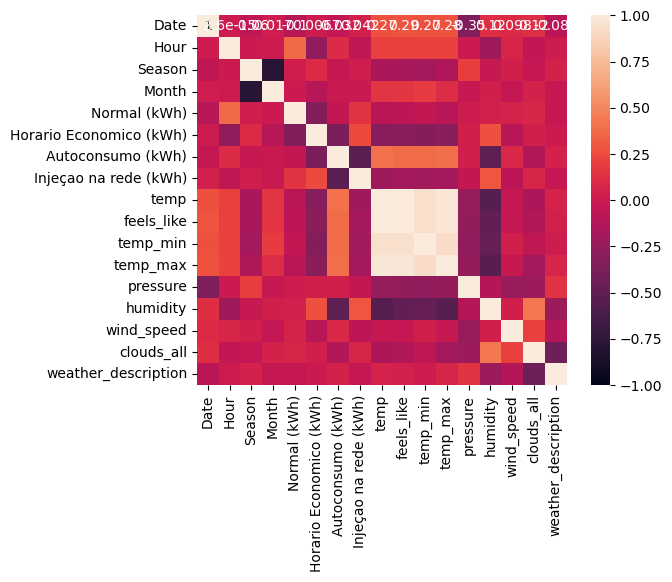

In [692]:
label_encoder_inr = preprocessing.LabelEncoder() 
label_encoder_wd = preprocessing.LabelEncoder()
label_encoder_d = preprocessing.LabelEncoder()  
label_encoder_s = preprocessing.LabelEncoder() 
label_encoder_m = preprocessing.LabelEncoder() 

treino['Injeçao na rede (kWh)'] = label_encoder_inr.fit_transform(treino['Injeçao na rede (kWh)'])
treino['weather_description'] = label_encoder_wd.fit_transform(treino['weather_description'])
treino['Date'] = label_encoder_d.fit_transform(treino['Date']) 
treino['Season'] = label_encoder_s.fit_transform(treino['Season']) 
treino['Month'] = label_encoder_m.fit_transform(treino['Month']) 

corr_matrix = treino.corr(numeric_only=True)
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)
plt.show()

In [693]:
treino[treino.columns[1:]].corr()['Injeçao na rede (kWh)'][:]

Hour                      -0.057440
Season                     0.024691
Month                     -0.015545
Normal (kWh)               0.147976
Horario Economico (kWh)    0.242812
Autoconsumo (kWh)         -0.527046
Injeçao na rede (kWh)      1.000000
temp                      -0.209680
feels_like                -0.195312
temp_min                  -0.199771
temp_max                  -0.193484
pressure                  -0.040450
humidity                   0.292897
wind_speed                -0.070369
clouds_all                 0.077215
weather_description       -0.034752
Name: Injeçao na rede (kWh), dtype: float64

In [694]:
treino['Injeçao na rede (kWh)']= label_encoder_inr.inverse_transform(treino['Injeçao na rede (kWh)'])
treino['weather_description']= label_encoder_wd.inverse_transform(treino['weather_description'])
treino['Date']= label_encoder_d.inverse_transform(treino['Date'])
treino['Season']= label_encoder_s.inverse_transform(treino['Season'])
treino['Month']= label_encoder_m.inverse_transform(treino['Month'])
treino

,Date,Hour,Season,Month,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injeçao na rede (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description
672,2021-09-29,0,Autumn,September,0.000,0.000,0.0,None,13.97,13.54,11.45,14.04,1027,81,1.96,87,overcast clouds
673,2021-09-29,1,Autumn,September,0.000,0.000,0.0,None,13.48,13.02,13.43,13.90,1028,82,1.83,91,overcast clouds
674,2021-09-29,2,Autumn,September,0.000,0.000,0.0,None,12.93,12.47,12.72,13.43,1027,84,1.96,93,overcast clouds
675,2021-09-29,3,Autumn,September,0.000,0.000,0.0,None,12.61,12.15,10.34,12.93,1027,85,1.85,95,overcast clouds
676,2021-09-29,4,Autumn,September,0.000,0.000,0.0,None,12.61,12.17,9.79,12.93,1027,86,1.83,93,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11683,2022-12-31,19,Winter,December,1.693,0.000,0.0,None,15.70,15.57,15.57,15.72,1018,86,5.56,100,moderate rain
11684,2022-12-31,20,Winter,December,1.327,0.000,0.0,None,15.55,15.43,12.72,15.70,1018,87,4.47,100,heavy intensity rain
11685,2022-12-31,21,Winter,December,0.757,0.000,0.0,None,13.45,13.28,12.23,13.99,1019,93,3.29,100,heavy intensity rain
11686,2022-12-31,22,Winter,December,0.000,0.675,0.0,None,12.93,12.73,12.23,13.43,1019,94,1.49,100,moderate rain


## Fase 4: Tratamento de Dados pré modelação

We already noticed that the feature 'pressure' has little to no impact in the target feature 'Injeçao na rede (kWh)'. We can now remove that feature.

In [695]:
treino.drop(columns=['pressure'], inplace=True, axis=1)
teste.drop(columns=['pressure'], inplace=True, axis=1)

Dropping of features with super low correlation with the target feature

In [696]:
columns_to_drop = ['Date', 'Hour', 'Season', 'Month', 'wind_speed', 'clouds_all', 'weather_description']

treino.drop(columns=columns_to_drop, inplace=True, axis=1)
teste.drop(columns=columns_to_drop, inplace=True, axis=1)

Write the resulting datasets for later use.

In [697]:
treino.to_csv(f'datasets/treinoTratado.csv', index=False)
teste.to_csv(f'datasets/testeTratado.csv', index=False)